In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
filepath = 'C:\\Users\\kim\\Downloads\\ny.csv'
raw = pd.read_csv(filepath)

# Remove the first 3 rows of the data as it's superfluous
raw = raw[3:]

# Set the columns to be the Oth row
raw.columns = raw.iloc[0]

# Drop the 0th row (effectively, we're really just saying, I want to keep everything BUT the 0th row)
raw = raw[1:]
raw.columns=['City','Population','Violent','Murder','Rape1','Rape2','Robbery','AggAssault','PropertyCrime','Burglary','Larceny','Motor','Arson']
raw.head()

,City,Population,Violent,Murder,Rape1,Rape2,Robbery,AggAssault,PropertyCrime,Burglary,Larceny,Motor,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


This is the Linear Regression Model that we're trying to come up with:

Propertycrime=α0 + α1.Population + α2Population2 + α3Murder + α4Robbery

Let's look at the features:

In [3]:
raw['Murder']= pd.to_numeric(raw['Murder'], errors='coerce')
raw['Murder_feature'] = np.where(raw['Murder']>=1, 1, 0)
raw['Murder_feature'].value_counts()

0    302
1     49
Name: Murder_feature, dtype: int64

In [4]:
raw['Robbery'] = pd.to_numeric(raw['Robbery'], errors='coerce')
raw['Robbery_feature'] = np.where(raw['Robbery']>=1, 1, 0)
raw['Robbery_feature'].value_counts()

1    207
0    144
Name: Robbery_feature, dtype: int64

In [5]:
raw['Population'].head()

4     1,861
5     2,577
6     2,846
7    97,956
8     6,388
Name: Population, dtype: object

In [6]:
raw['Population'] = raw['Population'].str.replace(' ', '')
raw['Population'] = raw['Population'].str.replace(',', '')

In [7]:
raw['Population_3'] = pd.to_numeric(raw['Population'])
raw['Population_2'] = raw['Population_3']*raw['Population_3']

In [8]:
raw['Population_2'].head()

4    3.463321e+06
5    6.640929e+06
6    8.099716e+06
7    9.595378e+09
8    4.080654e+07
Name: Population_2, dtype: float64

In [9]:
raw['PropertyCrime'] = pd.to_numeric(raw['PropertyCrime'], errors='coerce')

Now we have all of our features like ready to go!!!  Let's do some Linear Regression, hello!

In [10]:
my_cols = ['Population', 'Population_2', 'Robbery_feature', 'Murder']
data = raw[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = raw['PropertyCrime'].fillna(0).as_matrix()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [12]:
data.shape

(351, 4)

In [13]:
data = data.fillna(method='ffill')

(351, 4)

In [14]:
data = data.apply(lambda x: pd.to_numeric(x,errors='ignore'))  

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.50273005e-04  -4.71092715e-12   2.00435423e+02  -2.90289302e+00]
Intercept: 
 42.663182209


In [16]:
regr.score(X_train, y_train)

0.21429588963278368

In [20]:
X_train.shape

(210, 4)

In [21]:
x = data['Population_2']
x.shape

(351,)

In [22]:
y = raw['PropertyCrime']

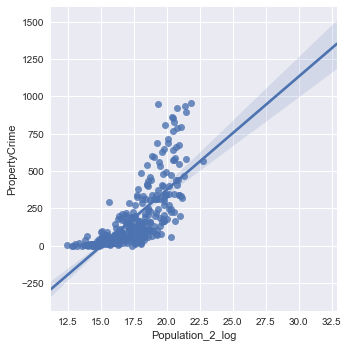

In [23]:
raw['Population_2_log'] = raw['Population_2'].apply(np.log)
sns.lmplot(x='Population_2_log', y='PropertyCrime', data=raw, y_jitter=0.1, x_jitter=0.1)

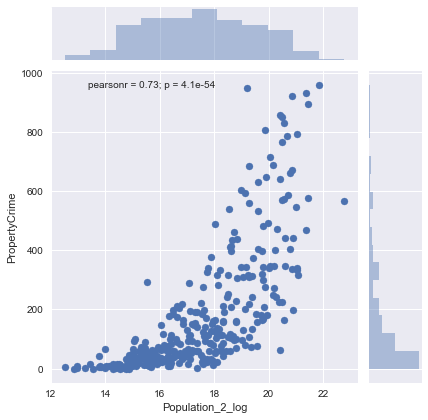

In [24]:
sns.jointplot(x='Population_2_log', y='PropertyCrime', data=raw)

In [35]:
my_cols = ['Population_2_log']
data = raw.dropna(subset=['Population_2_log','PropertyCrime'])
X = raw[my_cols].as_matrix()
y = raw['PropertyCrime'].as_matrix()

In [36]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.50273005e-04  -4.71092715e-12   2.00435423e+02  -2.90289302e+00]
Intercept: 
 42.663182209


In [43]:
regr.score(X_train, y_train)

0.18932845965173772

In [42]:
my_cols = ['Murder']
data = raw.dropna(subset=['Murder','PropertyCrime'])
X = data[my_cols].as_matrix()
y = data['PropertyCrime'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 102.22435689]
Intercept: 
 180.445783133


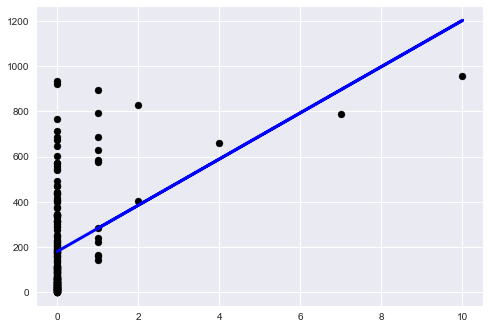

In [44]:
plt.scatter(X_train[:,0], y_train, color='black')
plt.plot(X_train[:,0], regr.predict(X_train), color='blue', linewidth=3)

In [45]:
my_cols = ['Population', 'Population_2_log', 'Robbery_feature', 'Murder']
data = raw[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = raw['PropertyCrime'].fillna(0).as_matrix()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.89223767e-04   1.66514345e+01   1.45129163e+02  -5.71568142e+00]
Intercept: 
 -217.484369582


In [47]:
regr.score(X_train, y_train)

0.24955026215837428

So changing Population Squared to the log of Population Squared increased the score, but this is still a really bad model.